In [2]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w

# Acquire

* Data has been acquired from Kaggle at https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
* The data set contained 319,795 observations and 18 features before cleaning
* Each observation represents one person in the study
* Each feature represents an aspect of each person's health
* Data set is imbalanced under 9% of respondants report  having had coronary heart disease or myocardial infarction

In [4]:
df = pd.read_csv('heart_2022.csv')

In [16]:
print(str(df['MentalHealthDays'].dtype))

float64


In [7]:
for col in df.columns:

    print(col)

State
Sex
GeneralHealth
PhysicalHealthDays
MentalHealthDays
LastCheckupTime
PhysicalActivities
SleepHours
RemovedTeeth
HadHeartAttack
HadAngina
HadStroke
HadAsthma
HadSkinCancer
HadCOPD
HadDepressiveDisorder
HadKidneyDisease
HadArthritis
HadDiabetes
DeafOrHardOfHearing
BlindOrVisionDifficulty
DifficultyConcentrating
DifficultyWalking
DifficultyDressingBathing
DifficultyErrands
SmokerStatus
ECigaretteUsage
ChestScan
RaceEthnicityCategory
AgeCategory
HeightInMeters
WeightInKilograms
BMI
AlcoholDrinkers
HIVTesting
FluVaxLast12
PneumoVaxEver
TetanusLast10Tdap
HighRiskLastYear
CovidPos


In [8]:
df.HadHeartAttack.value_counts()

No     232587
Yes     13435
Name: HadHeartAttack, dtype: int64

In [9]:
df.HadStroke.value_counts()

No     235910
Yes     10112
Name: HadStroke, dtype: int64

In [2]:
train, validate, test = w.get_my_data()

# Prepare

* There were no null values in this data set
* Features were renamed for convention and readability
* Dummy variables were created for catagorical features for use in modeling
* Data was split into train, validate, and test dataframes stratifying on heart disease ~(64/16/20)
* Scaled versions of numeric variables were added to the dataframe for use in modeling

In [3]:
train.bmi_cat.value_counts()

overwight         73188
obesity           65680
healthy weight    62508
underwight         3292
Name: bmi_cat, dtype: int64

In [4]:
num_cols = ['bmi',
            'poor_physical_health_days',
            'poor_mental_health_days',
            'sleep_hours']


cat_cols = ['heart_disease',
            'smoker',
            'heavy_drinker',
            'difficulty_walking',
            'diabetic',
            'physical_activity',
            'kidney_disease',
            'skin_cancer',
            'age_category',
            'general_health',
            'stroke',
            'sex',
            'race',
            'asthma',
            'bmi_cat']

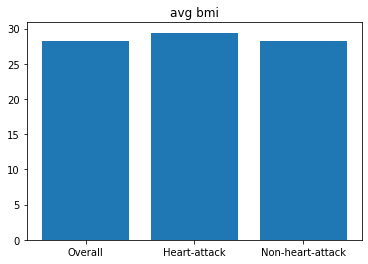

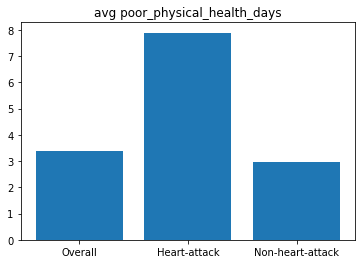

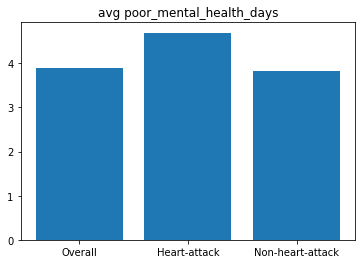

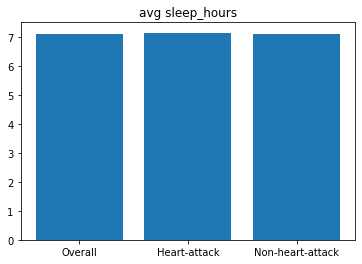

In [5]:
for col in num_cols:
    
    over = train[col].mean()
    heart = train[col][train.heart_disease == 'Yes'].mean()
    health = train[col][train.heart_disease == 'No'].mean()
    
    x = ['Overall', 'Heart-attack', 'Non-heart-attack']
    hight = [over, heart, health]
    
    plt.bar(x, hight)
    plt.title(f'avg {col}')
    plt.show()

heart_disease No 0 187150
heart_disease Yes 17518 17518


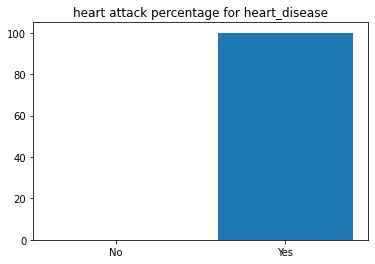

smoker No 7227 120387
smoker Yes 10291 84281


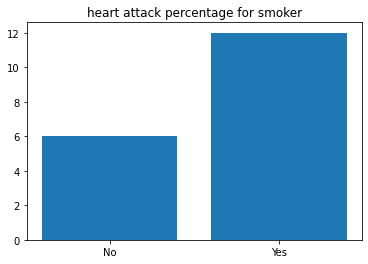

heavy_drinker No 16783 190736
heavy_drinker Yes 735 13932


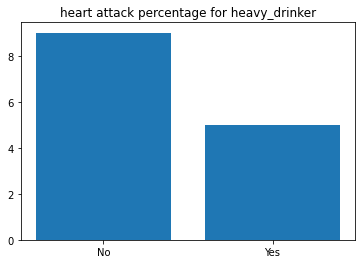

difficulty_walking No 11024 176196
difficulty_walking Yes 6494 28472


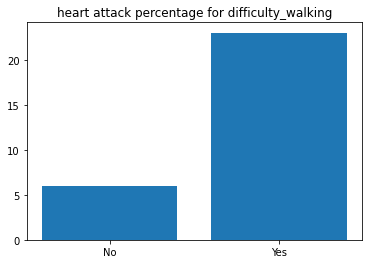

diabetic No 11177 172547
diabetic No, borderline diabetes 501 4379
diabetic Yes 5775 26084
diabetic Yes (during pregnancy) 65 1658


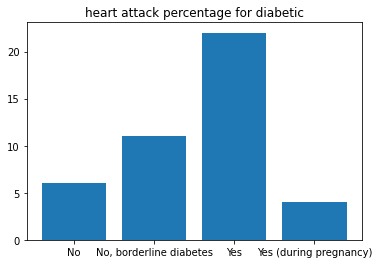

physical_activity No 6351 46104
physical_activity Yes 11167 158564


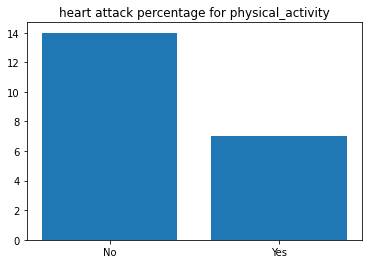

kidney_disease No 15334 197106
kidney_disease Yes 2184 7562


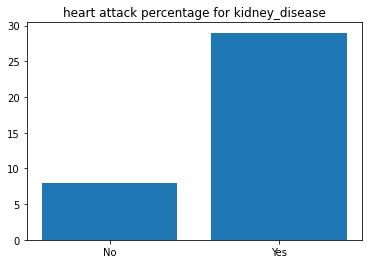

skin_cancer No 14347 185559
skin_cancer Yes 3171 19109


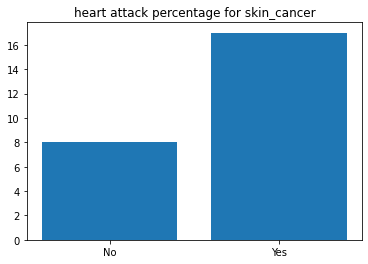

age_category 75-79 2589 13923
age_category 70-74 3140 19830
age_category 35-39 188 13136
age_category 65-69 2616 21930
age_category 55-59 1423 19127
age_category 25-29 89 10922
age_category 80 or older 3455 15480
age_category 30-34 144 11910
age_category 45-49 461 13888
age_category 40-44 318 13380
age_category 50-54 868 16202
age_category 18-24 83 13542
age_category 60-64 2144 21398


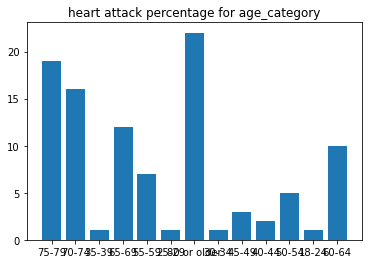

general_health Poor 2485 7263
general_health Excellent 934 42823
general_health Fair 4568 22302
general_health Very good 3403 72750
general_health Good 6128 59530


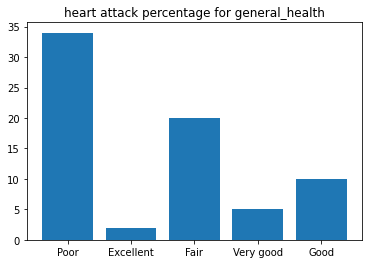

stroke No 14729 196962
stroke Yes 2789 7706


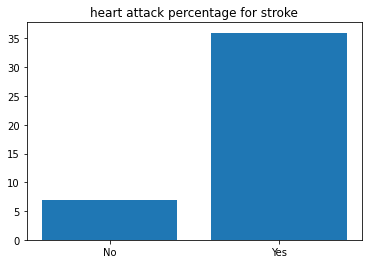

sex Male 10329 97097
sex Female 7189 107571


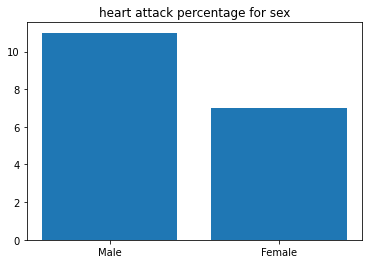

race American Indian/Alaskan Native 345 3344
race Hispanic 933 17658
race Asian 178 5211
race Black 1108 14721
race Other 564 6972
race White 14390 156762


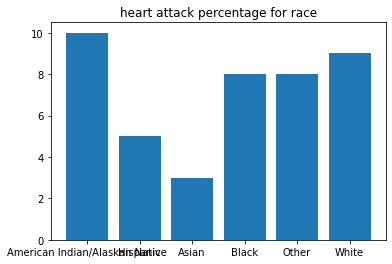

asthma No 14320 177217
asthma Yes 3198 27451


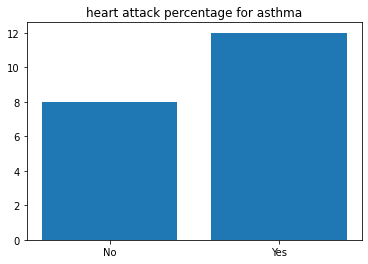

bmi_cat obesity 6845 65680
bmi_cat healthy weight 4084 62508
bmi_cat overwight 6328 73188
bmi_cat underwight 261 3292


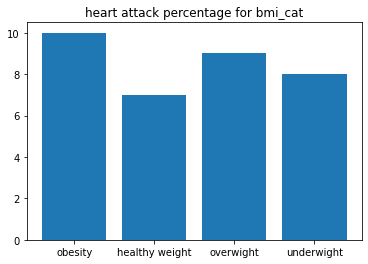

In [9]:


for col in cat_cols:

    vals = list(set(train[col].to_list()))
    hights = []

    for val in vals:
        
        num_val_heart = len(train[(train[col] == val) & (train['heart_disease'] == "Yes")])
        num_val = len(train[train[col] == val])

        print(col, val, num_val_heart, num_val)
        per_heart = round((num_val_heart/num_val),2)*100
        
        hights.append(per_heart)
        
    plt.bar(vals, hights)
    plt.title(f'heart attack percentage for {col}')
    plt.show()

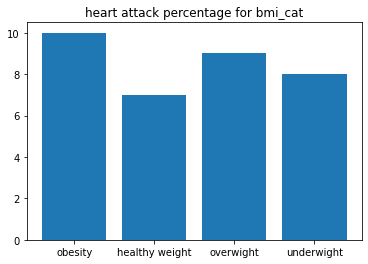

In [7]:
    vals = list(set(train[col].to_list()))
    hights = []

    for val in vals:

        heart_per = int(round(len(train[(train['bmi_cat'] == val) & (train['heart_disease'] == "Yes")])/len(train[(train[col] == val)]),2)*100)
        
        hights.append(heart_per)
        
    plt.bar(vals, hights)
    plt.title(f'heart attack percentage for {col}')
    plt.show()

In [8]:
0/12

0.0